# Welcome!

The purpose of this file (and the ones that follow after it) is to give users a quick dirty and overview of how to run the eco sim.  While it may seem complicated at first, in fact the simulator can be operated with ease even by someone with limited coding prowess. After reading through the tutorial files, you should be able to quickly harness most facets of the simulator with ease. 

To begin, let's import the `b2sim` module...

In [1]:
import b2sim as b2

## Eco'ing With Farms (The Basics)

The eco simulator, despite what the name may suggest, does *more* than just simulate eco. It can accurately simulate the progression of money when the player is simultaneously utilizing eco and farms and can also be used to track the progression of flowcharts over time. We will save the discussion on flowchart simulation for the next section, but for now consider the following toy example: Suppose it is Round 14 in a reasonably anti-stalled game, and I have access to 2 banana plantations with valuable bananas and am currently eco'ing with grouped blacks. I want to simulate the game from this round until the end of Round 16 and see how much money I have by then. To begin, we need to initialize the round lengths

In [2]:
rounds = b2.Rounds(0.1)

Here, the number specifies the "stall factor" for each round. $0$ represents a fully anti-stalled game while $1$ represents a fully-stalled game. If necessary, we can specify different rounds to have different stall factors, or even manually set the round times, but for now we will just stick to this simple construction. Next, let's specify the farms that we have...

In [3]:
farms = [
    b2.initFarm(rounds.getTimeFromRound(7), upgrades = [3,2,0]),
    b2.initFarm(rounds.getTimeFromRound(13.9), upgrades = [3,2,0])
]

In the `b2.InitFarm` call, the first argument denotes when the farm was purchased/last upgrades, which is important since farm upgrades have different rules for paying out when bought mid-round versus before a round. In our example case, the exact time is not important, only that we clearly tell the simulator that these farms were purchased before Round 14. As a side note, `13.9` in the above means 9/10ths of the way through round 13.

In general, if you intend to make purchases or change how you eco throughout the simulated game time, you'll also have to specify an "eco queue" and a "buy queue" before running the simulator, but for our toy example case this is not necessary. Let's proceed to defining the initial game state:

In [4]:
initial_state_game = {
    'Cash': 0,
    'Eco': 800,
    'Eco Send': b2.ecoSend(send_name = 'Grouped Blacks'),
    'Rounds': rounds, #Determines the lengths of the rounds in the game state
    'Farms': farms,
    'Game Round': 14
}

The `Rounds` paramater in the dictionary object up above corresponds with the `Rounds` object that we are using to track round lengths. Now that everything is defined, we can intialize an instance of the game with our parameters and simulate until the desired ending time. Simulation is performed using the `fastForward` method. If you want to view the results of your simulation, use the `viewCashEcoHistory` method.

,Time,Type,Message
0,288.0,Round,Round 14 start
1,288.0,Eco,Change eco to Grouped Blacks
2,300.7,Round,Round 15 start
3,317.0,Round,Round 16 start
4,351.4,Round,Round 17 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,2400.0,0,2400.0,227.0,288.0,351.0
1,2400.0,0,2400.0,227.0,288.0,351.0


The current cash and eco are (1073.0,1391.0)


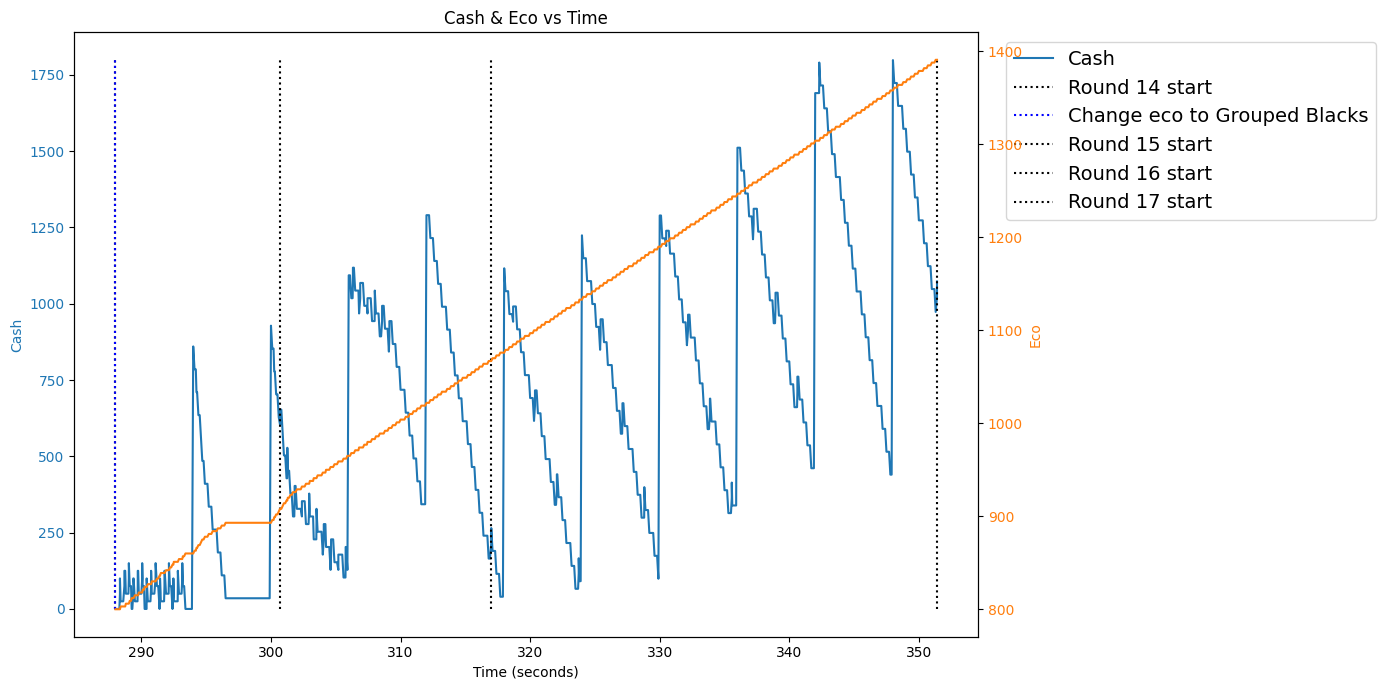

In [6]:
game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 17)
game_state.viewCashEcoHistory(dim=(14,7), display_farms= True, font_size=14)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'tut_log')

## A Note on Eco Impact

Eco impact measures the usefulness of a farm in terms of eco. It essentially answer the following question: How much eco would I need to make as much money as my farm did over the course of its lifetime during the simulation? Let $M$ be the amount of money the farm made during the simulation. Define $B$ to be the minimum between the time the farm was sold and the end of si
mulation time and define $A$ to be the maximum between the time the farm was purchased and the start of simulation time. Then, the eco impact $I_F$ of the farm is given by $$I_F = \frac{6M}{B-A}$$
Eco impact is a useful way of measuring the effectiveness of a farm and can be helpful in weighing the benefits/downsides of forgoing eco for more farms.